In [1]:
import os

nb_name = "nb20230622_215600_ACh_cueonset_2_outcomes.ipynb" #TODO change this

basename, ext = os.path.splitext(nb_name)
input_path = os.path.join(os.getcwd(), nb_name)

!jupyter nbconvert "{input_path}" --to="python" --output="{basename}"

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook d:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical\nb20230622_215600_ACh_cueonset_2_outcomes.ipynb to python
[NbConvertApp] Writing 7939 bytes to d:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical\nb20230622_215600_ACh_cueonset_2_outcomes.py


- `trial_nb` or cue onset time stamps
    - `df_pycontrol['time'][df_pycontrol['name']== 'hold_for_water']`
- time between `last_bar_off` and `first_spout`
- dip size
    - selected_data = xr_photometry['hold_for_water_zscored_df_over_f'].sel(trial_nb=k, event_time=slice(150, 300))
- rebound size
    - selected_data = xr_photometry['hold_for_water_zscored_df_over_f'].sel(trial_nb=k, event_time=slice(350, 700))


\\ettina\Magill_Lab\Julien\Data\head-fixed\by_sessions\reaching_go_spout_bar_nov22\TT002-2023-06-22-111549\processed

- lots of abortions


In [2]:
import os
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks


from trialexp.process.pycontrol import event_filters
from trialexp.process.pycontrol.event_filters import extract_event_time

datadir = r'\\ettina\Magill_Lab\Julien\Data\head-fixed\by_sessions\reaching_go_spout_bar_nov22\TT001-2023-06-07-150956\processed'

xr_photometry = xr.open_dataset(os.path.join(datadir, 'xr_photometry.nc'))
xr_session = xr.open_dataset(os.path.join(datadir, 'xr_session.nc'))
df_pycontrol = pd.read_pickle(os.path.join(datadir, 'df_pycontrol.pkl'))
df_events = pd.read_pickle(os.path.join(datadir, 'df_events_cond.pkl'))


In [3]:

first_spout = extract_event_time(df_events, event_filters.get_first_spout,{})
last_bar_off = extract_event_time(
    df_events, event_filters.get_last_bar_off_before_first_spout, {})

last_bar_off #TODO trial_nb 176 (last) is missing

last_bar_off_2_first_spout = first_spout - last_bar_off

# replace NaN with 6000 ms
last_bar_off_2_first_spout = last_bar_off_2_first_spout.fillna(6000)


In [4]:
last_bar_off_2_first_spout

trial_nb
1.0      6000.0
2.0        53.0
3.0      6000.0
4.0       144.0
5.0      6000.0
          ...  
254.0    6000.0
255.0    6000.0
256.0    6000.0
257.0    6000.0
258.0    6000.0
Name: time, Length: 258, dtype: float64

In [5]:
df_pycontrol


,type,name,time,duration,value
8,parameters,max_valid_spout_touches,0.0,NaN,1
9,parameters,hold_time_required_ms,0.0,NaN,1000
10,parameters,max_waiting_for_spout_ms,0.0,NaN,6000
11,parameters,break_after_trial_ms,0.0,NaN,"[3000,5000]"
12,parameters,consec_fail_for_bar_off_water,0.0,NaN,50
...,...,...,...,...,...
6978,state,hold_for_water,2699111.0,NaN,NaN
6979,event,rsync,2699783.0,NaN,NaN
6980,event,block_timer,2700000.0,NaN,NaN
6981,print,NaN,2700000.0,NaN,Finished


In [6]:
# hold_for_water = df_pycontrol['time'][df_pycontrol['name']== 'hold_for_water']
# spout = df_pycontrol['time'][df_pycontrol['name']== 'spout']
# bar_off = df_pycontrol['time'][df_pycontrol['name']== 'bar_off']


([<matplotlib.axis.XTick at 0x17a57e01700>,
 [Text(0, 0, '0'),
  Text(100, 0, '100'),
  Text(200, 0, '200'),
  Text(300, 0, '300'),
  Text(400, 0, '400'),
  Text(500, 0, '500'),
  Text(600, 0, '600'),
  Text(700, 0, '700'),
  Text(800, 0, '800'),
  Text(900, 0, '900')])

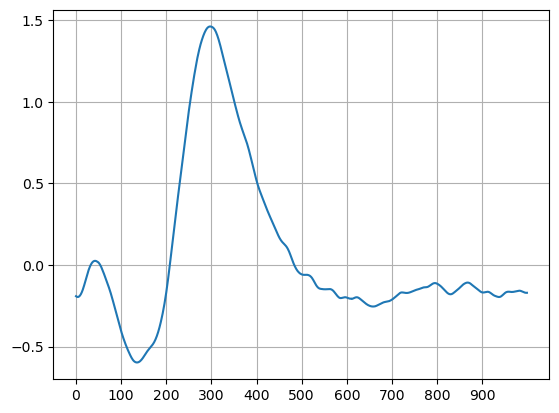

In [7]:
selected_data = xr_photometry['hold_for_water_zscored_df_over_f'].sel(event_time=slice(0, 1000))
selected_data.dims

average_curve = selected_data.mean(dim='trial_nb')


fig, ax = plt.subplots()

plt.plot(average_curve)
ax.grid(True)
plt.xticks(np.arange(0,1000,100))




In [8]:
xr_session.trial_nb


<xarray.DataArray 'trial_nb' (trial_nb: 258)>
array([  1,   2,   3, ..., 256, 257, 258], dtype=int64)
Coordinates:
  * trial_nb  (trial_nb) int64 1 2 3 4 5 6 7 8 ... 252 253 254 255 256 257 258

In [9]:
trial_nb_all = int(max(xr_session.trial_nb))


In [10]:
# dip_values = []
# reb_values = []

# # Loop over trial numbers from 1 to trial_nb_all
# for k in range(1, trial_nb_all+1):
#     # Calculate the mean over the specified event_time interval for dip
#     dip = xr_photometry['hold_for_water_zscored_df_over_f'].sel(
#         trial_nb=k, event_time=slice(75, 200)).mean(dim='event_time')
#     # Append the value to the list
#     dip_values.append(dip.values)

#     # Calculate the mean over the specified event_time interval for reb
#     reb = xr_photometry['hold_for_water_zscored_df_over_f'].sel(
#         trial_nb=k, event_time=slice(250, 400)).mean(dim='event_time')
#     # Append the value to the list
#     reb_values.append(reb.values)

# # Convert lists to pandas Series
# dip_series = pd.Series(dip_values)
# reb_series = pd.Series(reb_values)




In [11]:
# find_peaks
dip_values = []
reb_values = []

# Loop over trial numbers from 1 to trial_nb_all
for k in range(1, trial_nb_all+1):
    # Calculate the mean over the specified event_time interval for dip
    dip = xr_photometry['hold_for_water_zscored_df_over_f'].sel(
        trial_nb=k, event_time=slice(75, 250))
    
    # Append the value to the list
    dip_values.append(dip.values.min())

    # Calculate the mean over the specified event_time interval for reb
    reb = xr_photometry['hold_for_water_zscored_df_over_f'].sel(
        trial_nb=k, event_time=slice(200, 600)).mean(dim='event_time')
    # Append the value to the list
    reb_values.append(reb.values.max())

# Convert lists to pandas Series
dip_series = pd.Series(dip_values)
reb_series = pd.Series(reb_values)


In [24]:

new_inex = range(1, trial_nb_all+1)
df_trials = pd.DataFrame({
    'trial_nb': list(range(1,trial_nb_all+1)),
    'dip': dip_series.reindex(new_inex),
    'rebound': reb_series.reindex(new_inex),
    'last_bar_off_2_first_spout': last_bar_off_2_first_spout.reindex(new_inex),
    'outcome': xr_session['trial_outcome'].values.T.flatten(),  # flatten is used to convert (175, 1) to (175,)
    })
df_trials

df_trials = df_trials.dropna(subset=['dip'])
df_trials = df_trials.dropna(subset=['rebound'])

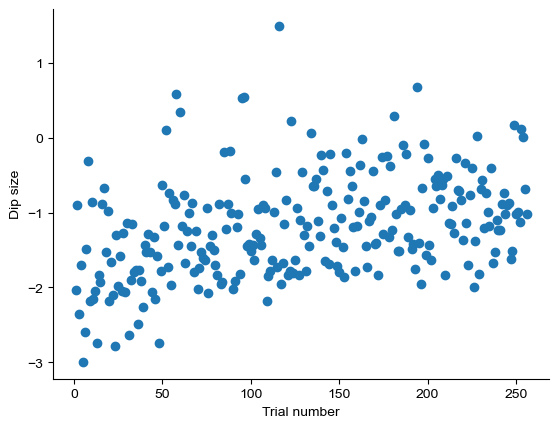

In [45]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots()

ax1.plot(df_trials['trial_nb'], df_trials['dip'],'o')
# plt.plot(df_trials['trial_nb'], df_trials['rebound'],'o-')


# ax2 = ax1.twinx()
# ax2.plot(df_trials['trial_nb'], df_trials['last_bar_off_2_first_spout'],'or')

plt.ylabel('Dip size')
plt.xlabel('Trial number')
plt.show()

In [54]:
df_trials['trial_nb']


1        1
2        2
3        3
4        4
5        5
      ... 
252    252
253    253
254    254
255    255
256    256
Name: trial_nb, Length: 256, dtype: int64

Pearsons correlation: 0.383, p = 2.318730099477641e-10


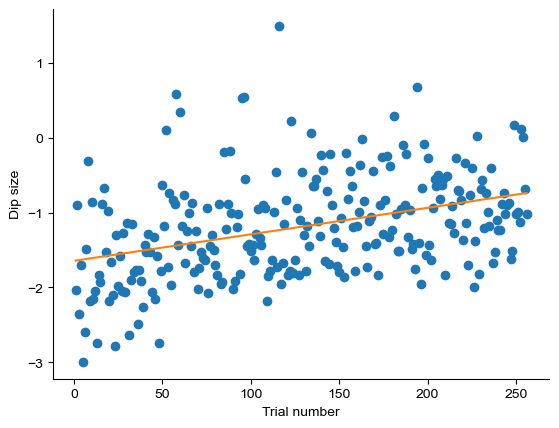

In [55]:
from scipy.stats import pearsonr
from scipy.stats import linregress

corr, p_val = pearsonr(df_trials['trial_nb'], df_trials['dip'])

print(f'Pearsons correlation: {corr:.3f}, p = {p_val}')

slope, intercept, r_value, p_value, std_err = linregress(df_trials['trial_nb'], df_trials['dip'])


fig, ax1 = plt.subplots()

ax1.plot(df_trials['trial_nb'], df_trials['dip'],'o')
# plt.plot(df_trials['trial_nb'], df_trials['rebound'],'o-')

y_regress = df_trials['trial_nb'].values * slope + intercept

ax1.plot(df_trials['trial_nb'], y_regress)

plt.ylabel('Dip size')
plt.xlabel('Trial number')
plt.show()

Pearsons correlation: 0.061, p = 0.33282331602473886


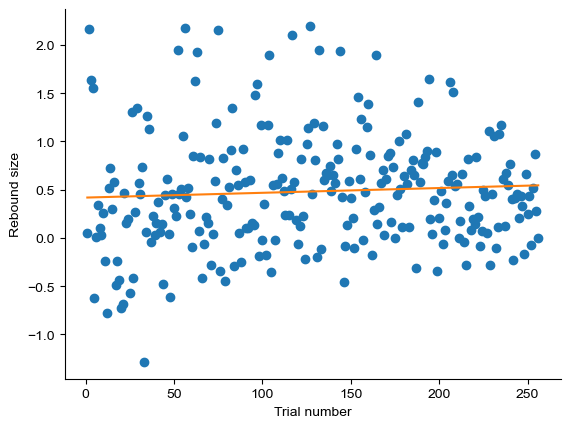

In [56]:
from matplotlib import pyplot as plt

corr, p_val = pearsonr(df_trials['trial_nb'], df_trials['rebound'])

print(f'Pearsons correlation: {corr:.3f}, p = {p_val}')

slope, intercept, r_value, p_value, std_err = linregress(
    df_trials['trial_nb'], df_trials['rebound'])


fig, ax1 = plt.subplots()

ax1.plot(df_trials['trial_nb'], df_trials['rebound'], 'o')

y_regress = df_trials['trial_nb'].values * slope + intercept

ax1.plot(df_trials['trial_nb'], y_regress)

plt.ylabel('Rebound size')
plt.xlabel('Trial number')
plt.show()


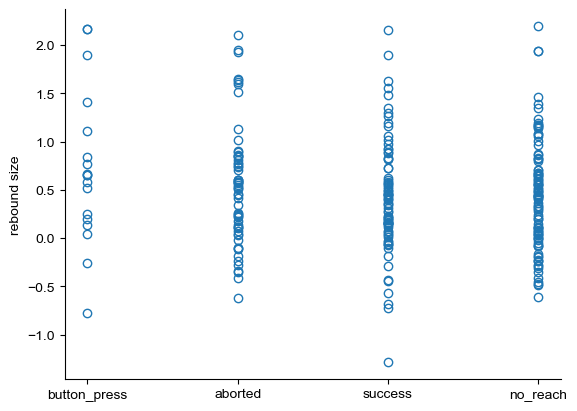

In [27]:
from matplotlib import pyplot as plt

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams["legend.frameon"] = False
plt.rcParams['font.family'] = ['Arial']

fig, ax1 = plt.subplots()

ax1.plot( df_trials['outcome'], df_trials['rebound'], 'o', fillstyle='none')

plt.ylabel('rebound size')

plt.show()


In [23]:
df_trials['dip'][df_trials['outcome'] == 'success']


4     -1.696230
6     -2.594753
7     -1.489409
14    -1.837264
19    -0.978006
         ...   
203   -0.933926
229   -1.818003
230   -0.681876
231   -0.568431
233   -0.743347
Name: dip, Length: 79, dtype: float64

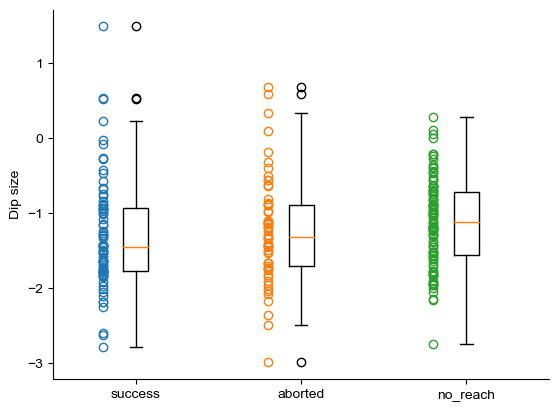

In [28]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots()

ax1.plot(np.ones([np.count_nonzero(df_trials['outcome'] == 'success'),1]), df_trials['dip'][df_trials['outcome'] == 'success'],  'o', fillstyle='none')
ax1.boxplot(df_trials['dip'][df_trials['outcome'] == 'success'],  positions=[
            1.2], vert=True, patch_artist=False)

ax1.plot(np.ones([np.count_nonzero(df_trials['outcome'] == 'aborted'),1])*2, df_trials['dip'][df_trials['outcome'] == 'aborted'],  'o', fillstyle='none')
ax1.boxplot(df_trials['dip'][df_trials['outcome'] == 'aborted'],  positions=[
            2.2], vert=True, patch_artist=False)

ax1.plot(np.ones([np.count_nonzero(df_trials['outcome'] == 'no_reach'),1])*3, df_trials['dip'][df_trials['outcome'] == 'no_reach'],  'o', fillstyle='none')
ax1.boxplot(df_trials['dip'][df_trials['outcome'] == 'no_reach'],  positions=[
            3.2], vert=True, patch_artist=False)


ax1.set_xticklabels(['success','aborted','no_reach'])
plt.ylabel('Dip size')
plt.show()

In [37]:
reach_dip


3     -2.360390
4     -1.696230
5     -2.994168
6     -2.594753
7     -1.489409
         ...   
232   -1.203190
233   -0.743347
236   -0.403846
237   -1.669413
239   -1.102605
Name: dip, Length: 140, dtype: float64

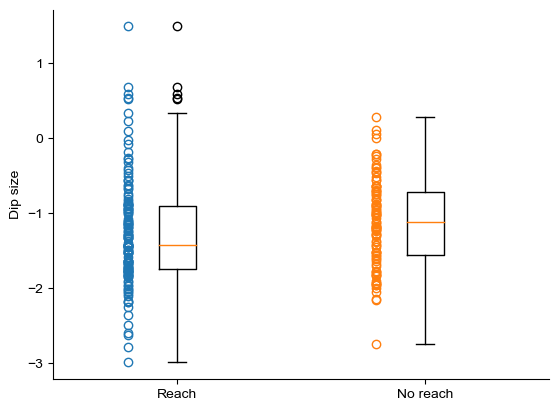

In [42]:
fig, ax1 = plt.subplots()
# Get 'dip' values for 'reach' and 'no_reach' groups
reach_dip = df_trials['dip'][df_trials['outcome'].isin(
    ['success', 'aborted'])].dropna()
no_reach_dip = df_trials['dip'][df_trials['outcome'] == 'no_reach'].dropna()


ax1.plot(np.ones([reach_dip.shape[0], 1]),
         reach_dip,  'o', fillstyle='none')
ax1.boxplot(reach_dip,  positions=[
            1.2], vert=True, patch_artist=False)

ax1.plot(np.ones([no_reach_dip.shape[0], 1])*2,
         no_reach_dip,  'o', fillstyle='none')
ax1.boxplot(no_reach_dip,  positions=[
            2.2], vert=True, patch_artist=False)


ax1.set_xticklabels(['Reach',  'No reach'])
plt.ylabel('Dip size')
plt.show()


In [31]:
from scipy.stats import mannwhitneyu

# Get 'dip' values for 'reach' and 'no_reach' groups
reach_dip = df_trials['dip'][df_trials['outcome'].isin(
    ['success', 'aborted'])].dropna()
no_reach_dip = df_trials['dip'][df_trials['outcome'] == 'no_reach'].dropna()

# Perform Mann-Whitney U test
u_val, p_val = mannwhitneyu(reach_dip, no_reach_dip, alternative='two-sided')

print('U-value:', u_val)
print('p-value:', p_val)


U-value: 5636.0
p-value: 0.019255174456783538


In [30]:
import scipy.stats as stats

# Get dip values for each outcome category
success_dip = df_trials['dip'][df_trials['outcome'] == 'success'].dropna()
aborted_dip = df_trials['dip'][df_trials['outcome'] == 'aborted'].dropna()
no_reach_dip = df_trials['dip'][df_trials['outcome'] == 'no_reach'].dropna()

# Perform ANOVA
f_val, p_val = stats.f_oneway(success_dip, aborted_dip, no_reach_dip)

print('F-value:', f_val)
print('p-value:', p_val)


F-value: 1.6038486337094817
p-value: 0.20331451869390937


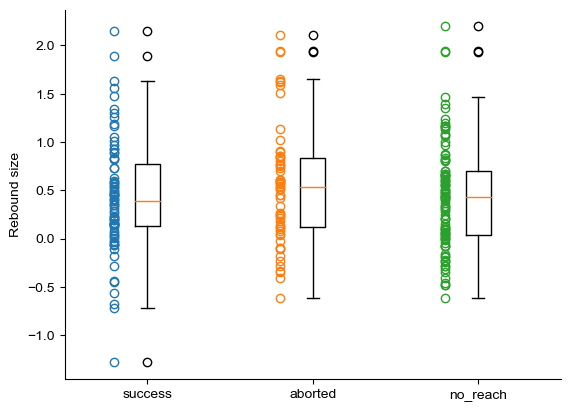

In [32]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots()

ax1.plot(np.ones([np.count_nonzero(df_trials['outcome'] == 'success'),1]), df_trials['rebound'][df_trials['outcome'] == 'success'],  'o', fillstyle='none')
ax1.boxplot(df_trials['rebound'][df_trials['outcome'] == 'success'],  positions=[
            1.2], vert=True, patch_artist=False)

ax1.plot(np.ones([np.count_nonzero(df_trials['outcome'] == 'aborted'),1])*2, df_trials['rebound'][df_trials['outcome'] == 'aborted'],  'o', fillstyle='none')
ax1.boxplot(df_trials['rebound'][df_trials['outcome'] == 'aborted'],  positions=[
            2.2], vert=True, patch_artist=False)

ax1.plot(np.ones([np.count_nonzero(df_trials['outcome'] == 'no_reach'),1])*3, df_trials['rebound'][df_trials['outcome'] == 'no_reach'],  'o', fillstyle='none')
ax1.boxplot(df_trials['rebound'][df_trials['outcome'] == 'no_reach'],  positions=[
            3.2], vert=True, patch_artist=False)


ax1.set_xticklabels(['success','aborted','no_reach'])
plt.ylabel('Rebound size')
plt.show()

In [33]:
df_trials100 = df_trials.loc[0:99, :]


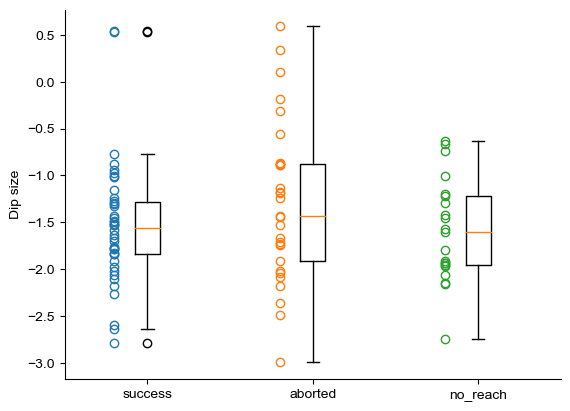

In [34]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots()

ax1.plot(np.ones([np.count_nonzero(df_trials100['outcome'] == 'success'), 1]),
         df_trials100['dip'][df_trials100['outcome'] == 'success'],  'o', fillstyle='none')
ax1.boxplot(df_trials100['dip'][df_trials100['outcome'] == 'success'],  positions=[
            1.2], vert=True, patch_artist=False)

ax1.plot(np.ones([np.count_nonzero(df_trials100['outcome'] == 'aborted'), 1])*2,
         df_trials100['dip'][df_trials100['outcome'] == 'aborted'],  'o', fillstyle='none')
ax1.boxplot(df_trials100['dip'][df_trials100['outcome'] == 'aborted'],  positions=[
            2.2], vert=True, patch_artist=False)

ax1.plot(np.ones([np.count_nonzero(df_trials100['outcome'] == 'no_reach'), 1])*3,
         df_trials100['dip'][df_trials100['outcome'] == 'no_reach'],  'o', fillstyle='none')
ax1.boxplot(df_trials100['dip'][df_trials100['outcome'] == 'no_reach'],  positions=[
            3.2], vert=True, patch_artist=False)


ax1.set_xticklabels(['success', 'aborted', 'no_reach'])
plt.ylabel('Dip size')
plt.show()


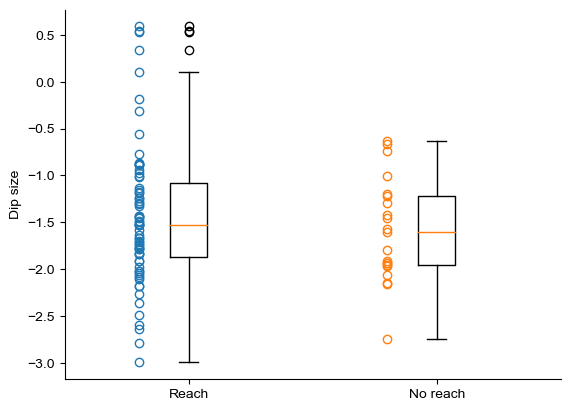

In [43]:
fig, ax1 = plt.subplots()
# Get 'dip' values for 'reach' and 'no_reach' groups
reach_dip = df_trials100['dip'][df_trials100['outcome'].isin(
    ['success', 'aborted'])].dropna()
no_reach_dip = df_trials100['dip'][df_trials100['outcome'] == 'no_reach'].dropna()


ax1.plot(np.ones([reach_dip.shape[0], 1]),
         reach_dip,  'o', fillstyle='none')
ax1.boxplot(reach_dip,  positions=[
            1.2], vert=True, patch_artist=False)

ax1.plot(np.ones([no_reach_dip.shape[0], 1])*2,
         no_reach_dip,  'o', fillstyle='none')
ax1.boxplot(no_reach_dip,  positions=[
            2.2], vert=True, patch_artist=False)


ax1.set_xticklabels(['Reach',  'No reach'])
plt.ylabel('Dip size')
plt.show()